##  Graphical analysis of difference equations



In addition to calculating numeric solutions, computaers can be used to perform *graphical analysis* of discrete time models. A lot of information can be gleaned by plotting the graph of the updating function of an recurrent difference equaiotn $x_{t+1} = f(x_t)$. Here is a summary of what we can learn from the graph of the function $f(x)$:

```{admonition} Graph of the updating function
:class: tip 

1.  The location of the fixed points of the iterated map. Since the condition for a fixed point is $f(x) = x$, they can be found at the intersections of the graph of $y=f(x)$ and $y=x$ (the identity straight line).

2.  The stability of fixed points. We learned that the derivative of $f(x)$ at a fixed point determines its stability. Graphically, this means that the slope of $f(x)$ at the point of intersection with $y=x$ can be used for this purpose; if it is steeper (in absolute value) than the straight line $y=x$, then the fixed point is unstable, but if its slope is less than one in absolute value, the equilibrium is stable.

3.  Graphical iteration of the difference equation. The value of the function $f(x)$ gives the value of $x$ at the next time step, and this fact can be used to produce a graph of successive values of the dependent variable: $x_0, x_1, x_2, ...$
```
Below we will demonstrate how to plot the updating function in Python and how to peform this analysis.


### plot of the updating function

Let us consider a linear discrete-time model:

$$
x_{t+1} = 5x_t - 10
$$

Instead of iterating this equation starting from a particular initial value to produce a sequence of values, we will plot the function $f(x) = 0.5 x - 10$ and use it to predict how solutions behave starting from *any* initial value. To do this, we will plot this function over a range of x values, along the the line $y=x$.

In [1]:
# Import packages
import numpy as np # package for work with arrays and matrices
import matplotlib.pyplot as plt # package with plotting capabilities

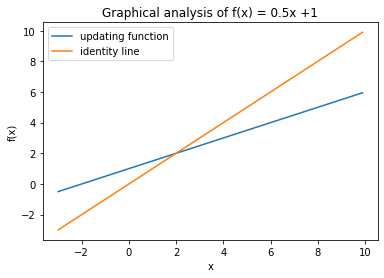

In [2]:
x = np.arange(-3,10,0.1) # range of x values
fx = 0.5*x + 1 # values of the updating function
plt.plot(x, fx, label = 'updating function') # plot the updating function
plt.plot(x, x, label = 'identity line')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graphical analysis of f(x) = 0.5x +1')
plt.legend()
plt.show()

The plot show thats the updating function intersects the identity line at $x=2$, which is the (only) fixed point of this dynamic model. But it is stable or unstable? And how will solutions behave?

### cobweb plot

Let us exploit the idea in the third point for graphical analysis of an iterated map. Starting with some initial condition $x_0$, the value of $x_1$ is given by $f(x_0)$. To show this graphically, starting the point $x_0$ on the axis, draw a vertical line to $y=f(x_0)$. Next, draw a horizontal line to the graph of $y=x$. Since the $y$ and $x$ coordinates are equal, we now have the value of $x_1 = f(x_0)$ as the x coordinate. Then, repeat the process by drawing a vertical line to $y=f(x_1)$, and the a horizontal line $y=x$, etc. The resulting sequence of x coordinates is a quick way of assessing the dynamics of the iterated map. For instance, the values may converge to a fixed point, or grow to infinity, or bounce around without settling down. The resulting graph of alternating vertical and horizontal line segments is called a cobweb plot: 

```{admonition} Cobweb plot pseudocode
:class: tip 

* define the updating function $f(x)$ 
* plot the graph of $f(x)$
* plot the identity line $y=x$
* set n to be the number of steps
* initialize an array x of length 2*n
* initialize an array y of length 2*n
* set $x[0]$ to the initial value
* set $y[0]$ to 0
* for n steps repeat (with i increasing by 2):
    - set $x[i+1] \gets x[i]$
    - set $y[i+1] \gets f(x[i])$
    - set $x[i+2] \gets y[i+1]$
    - set $y[i+2] \gets y[i+1]$
* plot the sequence of points $(x,y)$ on the same plot
```
Here is an implementation of the cobweb plot for the same linear model as above.

[-3.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[0 2 4 6 8]


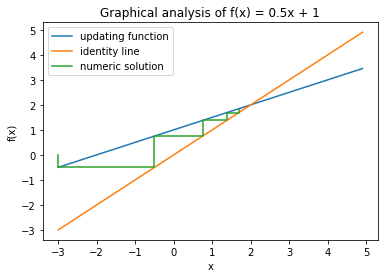

In [3]:
x = np.arange(-3,5,0.1) # range of x values
fx = 0.5*x + 1 # values of the updating function
plt.plot(x, fx, label = 'updating function') # plot the updating function
plt.plot(x, x, label = 'identity line')

# the cobweb plot script
n = 5 # number of steps
x = np.zeros(n*2)
y = np.zeros(n*2)
x[0] = -3
print(x)
print(np.arange(0,2*n,2))
for i in np.arange(0,2*(n-1),2):
    x[i+1] = x[i] # keep the same x coordinate
    y[i+1] = 0.5*x[i] + 1 # the updating function
    x[i+2] = y[i+1] # move to the next x value
    y[i+2] = y[i+1] # keep the same y coordinate
x[2*n-1] = x[2*n-2] # finish the last half-iteration
y[2*n-1] = 0.5*x[2*n-2] + 1 # finish the last half-iteration

plt.plot(x,y, label = 'numeric solution')    
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graphical analysis of f(x) = 0.5x + 1')
plt.legend()
plt.show()

You can see that the solution, shown in green, start from initial value of -3 and steps upward toward the fixed point at 2. You can experiment by trying a different initial value, say 10 (you will have to change the domain of the plotted function) but you should still observe convergence to the fixed point at 2. 

This could be predicted from the analysis performed in the previous section: the slope of the updating function is 0.5 (everywhere, since it's a straight line) and since that is less than 1 in absolute value, the fixed point is stable, and solutions are expected to converge to it.

We now have at our disposal analytical, numerical, and graphical tools to analyze and predict the behavior of a dynamical system. In the next section we will use all three to analyze a more complex model of population growth.


## Graphical analysis of the logistic model

As we saw, we can learn a lot about the behavior of a dynamical system from analyzing the graph of the defining function. Let us consider two quadratic functions for the logistic model: $f(N) = 2N(1-N/2)$ and $f(N) = 4N(1-N/4)$ .

First, plotting the graphs of $y=f(N)$ and $y=N$, allows us to find the fixed points of the logistic model. Since it is a , we see that there are fixed points at $N = 0$ for both functions, and carrying capacity sizes at $N=2$ and $N=3$, respectively. The reader should check that this is in agreement with the analytic prediction of $N^* = (r-1)/r$.

Second, we can obtain information about stability of the two fixed points by considering the slope of the curve $y=f(N)$ at the points where it crosses $y=N$. On the graph of the first function, the slope is clearly 0, which indicates that the fixed point is stable, in agreement with the analytical prediction. On the graph of the second function, the slope is negative and steeper than -1. This indicates that the fixed point is unstable, again consistent with our analysis above.

Third, we graph a few iterations of the cobweb plot to obtain an idea about the dynamics of the population over time. As expected, for the first function with $r=2$, the solution quickly approaches the carrying capacity ({numref. In the second function, however, $r = 4$ and the carrying capacity is unstable. In {numref}`fig-cobweb2` we observe a wild pattern of jumps that never approach any particular value.


```{figure} images/ch1_cobweb_1.png
---
name: fig-cobweb1
---
Cobweb plot of the logistic model with $r=2$, showing a solution converging to the stable fixed point at the intersection of the graphs of the function and the identity line
```



```{figure} images/ch1_cobweb_2.png
---
name: fig-cobweb2
---
Cobweb plot of the logistic model with $r=4$, showing a as solution bouncing around the unstable fixed point
```

We have seen how graphical tools can be used to analyze and predict the behavior of a dynamical system. In the case of the logistic model, we never found the analytic solution, because it frequently does not exist as a formula. Finding the fixed points and analyzing their stability, in conjunction with looking at the behavior of a cobweb plot, allowed us to describe the dynamics of population growth in the logistic model, without doing any “mathematics”. Together, the analytical and graphical analysis provide complementary tools for biological modelers.

### chaos in discrete dynamical systems

In this chapter we learned to analyze the dynamics of solutions of nonlinear discrete-time dynamical systems without solving them on paper. In the last two sections we focused on the logistic difference equation as a simple nonlinear model with a rich array of dynamic behaviors. In this section we will summarize the analysis and draw conclusions for difference equation models in biology. This behavior was brought to the attention of biologists by John Maynard Smith [@smith_mathematical_1968] and Robert May [@may_bifurcations_1976].

Why does the logistic model behave so strangely in the second example above? We can use numerical simulations to plot the long-term solutions for the dependent variable for a range of parameter values, let us say between $2.5 < r < 4$. Then we plot the values to which the simulation converged (whether it is one, two, or many) on the y-axis, and the value of the parameter $r$ on the x-axis. The resulting *bifurcation diagram* in shown in {numref}`fig-log-bifur`. The value of the parameter $r$ is plotted on the horizontal axis, and the set of values that the dependent variable takes in the long run is shown on the vertical axis. There is only one stable fixed point for $r<3$, then we see a 2-cycle appear for $3<r<3.45$. For values of $r$ greater than about 3.45, a series of period-doubling bifurcations occur with shorter and shorter intervals of $r$. This is called a *period-doubling cascade*, which culminates at the value of $r \approx 3.57$, where the number of points in the cycle becomes essentially infinite. The sequence of values of $r$ at which period-doubling occurs is approximately:

*   period 2; $r_1 = 3$

*   period 4; $r_2 \approx 3.449$

*   period 8; $r_3 \approx  3.544$

*   period 16; $r_4 \approx  3.564$

*   period 32; $r_5 \approx 3.569$

*   period $\infty$ (chaos); $r_\infty \approx  3.570$


```{figure} images/logistic_bifurc.png
---
name: fig-log-bifur
---
Bifurcation diagram for the logistic map $N(t+1)  = r(1 - N(t)) N(t)$, with the parameter $r$ on the horizontal axis and the vertical axis showing the values of the stable fixed point (for $r<3$), then the values of the period two oscillation, the period four oscillation, etc., and for $r$ greater than the critical value shows some of the values the solution chaotically jumps through.
```


For $r > r_\infty$, we observe a remarkable behavior found only in nonlinear dynamical systems, called *chaos*. Chaos is characterized by two qualities:

```{admonition} Characteristics of chaos

1.  **Aperiodic behavior**: the dependent variable never repeats a value exactly, instead bouncing around an infinite set of values for all time

2.  **Sensitive dependence on initial conditions**: no matter how close two initial conditions in a chaotic system, given enough time the two trajectories will diverge and lose any resemblance
```

What is especially surprising about chaos is that for a given initial condition a chaotic model gives a completely predictable and reproducible sequence of values of the dependent variable. However, given finite machine precision, or any error in initial conditions, a chaotic system is practically unpredictable and irreproducible. But there is a fundamental difference between deterministic chaos and a stochastic system, e.g. the model of coin tosses where knowing the previous result of the coin flip does not allow us to predict the next result, even under ideal conditions.

Notice in figure , that for $r > r_\infty$, chaotic behavior is observed only for some values of $r$. As you can see in figure , there are “bands of periodicity”, where the attractor is a  sequence of $n$ numbers (and periods of 3,5, etc. are observed), alternating with bands of chaos. This illustrates that even the simplest nonlinear discrete dynamical systems can have incredibly complex behavior. When these results were first published by May in the 1970s, they revolutionized both the mathematical understanding of dynamical systems, and the field of theoretical biology. In one-variable dynamic systens, chaos occurs only in discrete-time dynamical models, but for three or more variables continuous time (ODE) dynamical systems also can behavechaotically.

As a mathematical side-note, if one looks at the differences between successive values of $r_n$, they behave like a geometric sequence, getting smaller and smaller by a constant fraction:

$$
\delta_n = \frac{r_{n}-r_{n-1}}{r_{n+1}-r_{n}}
$$

It is a remarkable fact that $\delta_n$ approaches a constant value when $n$ gets large, $4.6692...$, known as the Feigenbaum constant. It can be proven that this constant is the same for other iterated maps with the same shape as the downward parabola of the logistic map (e.g. $f(x) = \sin(x)$). Explaining why this deep mathematical fact is true is far outside the bounds of this course. [@strogatz_nonlinear_2001]

Chaos was a popular topic back in the 1980s and 90s, and even inspired popular books [@gleick_chaos:_1988]. It is in fact remarkable that very simple difference equations can have solutions of apparently great complexity. This is intriguing because it appeals to a fairly universal human desire for simple explanations for complicated phenomena. The popular exposure to what was dubbed “chaos theory” (which is not an actual mathematical topic) spawned some inaccurate cliches, such as “a butterfly flapping its wings in South America can cause a hurricane to form and hit Florida”. The image refers to the phenomenon of sensitive dependence on initial conditions, but of course it is utterly ridiculous to draw a causal arrow between a butterfly (one of an enumerable number of things changing the “initial conditions”) and large-scale atmospheric phenomena. While there is some evidence that weather patters are complex systems that exhibit chaotic behavior, we lack the ability to isolate and control all influences that may perturb it, so pinning it on a butterfly is pretty unfair.

Despite the initial flurry of excitement, so-called chaos theory has failed to make a big impact on our understanding of complex biological systems. Although it is still quite fascinating intellectually, a simple model like the logistic model is not an adequate model for any realistic population, particularly for large values of $r$ where the chaotic behavior occurs. We now appreciate that the essential complexity of biological system requires multiple interacting variables which cannot be reduced to a single equation. However, there has been some successful observation of chaotic behavior in a population of flour beetles, which seemed to agree with predictions of a three-variable difference equation model [@costantino_chaotic_1997].

We have seen how graphical tools can be used to analyze and predict the behavior of a discrete-time dynamical system. We investigated the logistic model by finding the fixed points and analyzing their stability. Together with analysis of the graph of the updating function and making a cobweb plot, this allowed us to describe the dynamics of population growth in the logistic model, without doing any “math”. Together, analytical and graphical analysis provide powerful tools for biological modelers.

**Q3.1:** For the logistic model with an initial population of 0.5 and $r=1.1$, 
compute the first 50 iterations using the same for loop iteration
you used above and plot the solution against time. 

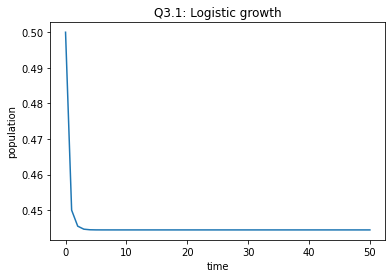

In [4]:
numsteps = 50 #set number of iterations
r = 1.8 #set parameter
N = np.zeros(numsteps+1) #initialize solution vector
N[0]=.5 #initial value
t = range(numsteps+1) #initialze time vector
a = -10
for i in range(numsteps):
    N[i+1] = r*N[i]*(1-N[i]) #logistic population model
plt.plot(t,N) #plot solution
plt.xlabel('time')
plt.ylabel('population')
plt.title('Q3.1: Logistic growth')
plt.show()
 

**Q3.2:** Change the parameter $r$ to the following values: 0.5, 2.0, and 3.2,
and in each case plot the solutions against time in separate figures.
Describe each plot with a sentence.

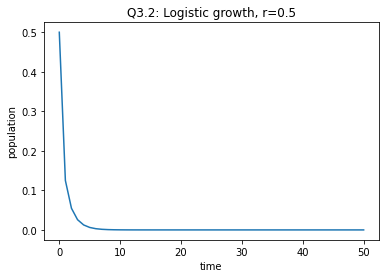

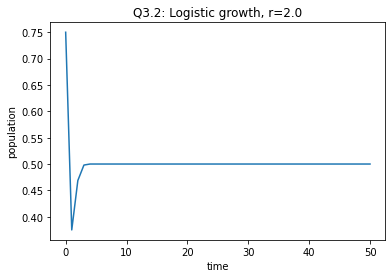

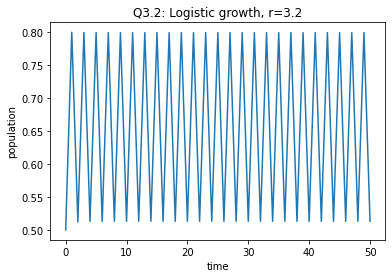

In [5]:
numsteps = 50 #set number of iterations
r = .5 #set parameter
N = np.zeros(numsteps+1) #initialize solution vector
N[0]=.5 #initial value
t = range(numsteps+1) #initialze time vector
a = -10
for i in range(numsteps):
    N[i+1] = r*N[i]*(1-N[i]) #linear population model
plt.plot(t,N) #plot solution
plt.xlabel('time')
plt.ylabel('population')
plt.title('Q3.2: Logistic growth, r=0.5')
plt.show()

numsteps = 50 #set number of iterations
r = 2.0 #set parameter
N = np.zeros(numsteps+1) #initialize solution vector
N[0]=0.75 #initial value
t = range(numsteps+1) #initialze time vector
a = -10
for i in range(numsteps):
    N[i+1] = r*N[i]*(1-N[i]) #linear population model
plt.plot(t,N) #plot solution
plt.xlabel('time')
plt.ylabel('population')
plt.title('Q3.2: Logistic growth, r=2.0')
plt.show()

numsteps = 50 #set number of iterations
r = 3.2 #set parameter
N = np.zeros(numsteps+1) #initialize solution vector
N[0]=.5 #initial value
t = range(numsteps+1) #initialze time vector
a = -10
for i in range(numsteps):
    N[i+1] = r*N[i]*(1-N[i]) #linear population model
plt.plot(t,N) #plot solution
plt.xlabel('time')
plt.ylabel('population')
plt.title('Q3.2: Logistic growth, r=3.2')
plt.show()

Answer:
 - The solution for r=0.5 decreases to zero
 - The solution for r=2.0 stays at the fixed point of 0.5
 - The solution for r=3.2 oscillates between two values indefinitely

**Q3.3:** Increase the parameter $r$ further until you see strange, aperiodic 
behavior called chaos. Report at least one value of $r$ at which you see
chaotic dynamics.

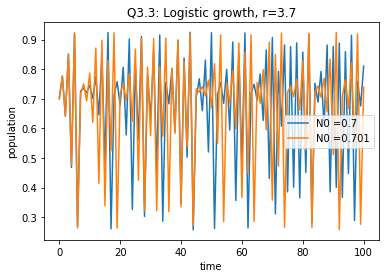

In [6]:
numsteps = 100 #set number of iterations
r = 3.7 #set parameter
N = np.zeros(numsteps+1) #initialize solution vector
N[0]=.7 #initial value
t = range(numsteps+1) #initialze time vector
a = -10
for i in range(numsteps):
    N[i+1] = r*N[i]*(1-N[i]) #linear population model
plt.plot(t, N, label = 'N0 =' + str(N[0]))

numsteps = 100 #set number of iterations
r = 3.7 #set parameter
N = np.zeros(numsteps+1) #initialize solution vector
N[0]=.701 #initial value
t = range(numsteps+1) #initialze time vector
a = -10
for i in range(numsteps):
    N[i+1] = r*N[i]*(1-N[i]) #linear population model
plt.plot(t,N, label = 'N0 =' + str(N[0])) #plot solution

plt.xlabel('time')
plt.ylabel('population')
plt.title('Q3.3: Logistic growth, r=3.7')
plt.legend()
plt.show()

Answer: At r=3.7 the solution bounces around without any apparent pattern, which is called chaos.